In [5]:
import math
import os

import cv2
from PIL import Image
import random
import numpy as np
from utils.detect_line import detect_lines
from utils.hot import hot_detect_line

import json

In [6]:
ori_img = cv2.imread('../static/img/4.png')
lines = hot_detect_line('../static/img/4.png', None, None, 0, path='../static/record/')

正在重载4.png[None:None, None:None]


In [7]:
lines

[[[3308, 1995], [3319, 1961], [0, 0, 0]],
 [[3321, 1956], [3330, 1927], [0, 0, 0]],
 [[3462, 1472], [3495, 1456], [255, 0, 0]],
 [[3468, 1459], [3495, 1472], [255, 0, 0]],
 [[3405, 1478], [3434, 1469], [0, 255, 0]],
 [[3353, 1495], [3400, 1480], [0, 255, 0]],
 [[3304, 1511], [3348, 1497], [0, 255, 0]],
 [[3252, 1528], [3299, 1513], [0, 255, 0]],
 [[3200, 1545], [3247, 1530], [0, 255, 0]],
 [[3151, 1561], [3195, 1547], [0, 255, 0]],
 [[3099, 1578], [3146, 1563], [0, 255, 0]],
 [[3047, 1595], [3094, 1580], [0, 255, 0]],
 [[2626, 1811], [2658, 1821], [0, 0, 0]],
 [[3587, 1392], [3655, 1461], [0, 255, 0]],
 [[3953, 1262], [3964, 1251], [0, 255, 0]],
 [[3553, 1251], [3564, 1262], [0, 255, 0]],
 [[3788, 1097], [3799, 1086], [0, 255, 0]],
 [[2793, 1972], [2804, 1983], [0, 255, 0]],
 [[3655, 1461], [3724, 1392], [0, 255, 0]],
 [[2693, 1461], [2702, 1470], [0, 255, 0]],
 [[2505, 1461], [2526, 1482], [0, 255, 0]],
 [[3788, 1251], [3799, 1262], [0, 255, 0]],
 [[3440, 679], [3450, 669], [0, 255, 0

In [8]:
# 颜色过滤
def color_filter(lines, color):
    return [line for line in lines if tuple(line[2]) != color]
def _line_length(line):
    return math.sqrt((line[0][0] - line[1][0]) ** 2 + (line[0][1] - line[1][1]) ** 2)
#是竖线
def _is_vertical(line):
    return line[0][0] - line[1][0] == 0
def _is_horizontal(line):
    return line[0][1] - line[1][1] == 0
# 斜线和直线分层
def line_filter(lines):
    lines_a = []
    lines_b = []
    for line in lines:
        if _is_vertical(line) or _is_horizontal(line):
            lines_a.append(line)
        else:
            lines_b.append(line)
    return lines_a, lines_b

In [9]:
lines_a = color_filter(lines, (0, 0, 0))
lines_a, lines_b = line_filter(lines_a)


In [10]:
import pandas as pd
lines_a = pd.DataFrame([[line[0][1], line[0][0], line[1][1], line[1][0], tuple(line[2]), int(_line_length(line))] for line in lines_a], columns=['x1', 'y1', 'x2', 'y2', 'color', 'length'])
lines_a

,x1,y1,x2,y2,color,length
0,1467,2154,1481,2154,"(0, 255, 0)",14
1,1467,2154,1481,2154,"(0, 255, 0)",14
2,2028,2154,2042,2154,"(0, 255, 0)",14
3,1458,2155,1466,2155,"(0, 255, 0)",8
4,1482,2155,1490,2155,"(0, 255, 0)",8
...,...,...,...,...,...,...
26486,18489,24809,18489,24817,"(0, 255, 0)",8
26487,18675,24785,18675,24793,"(0, 255, 0)",8
26488,18675,24809,18675,24817,"(0, 255, 0)",8
26489,18676,24794,18676,24808,"(0, 255, 0)",14


In [11]:
white = np.ones_like(ori_img, dtype=np.uint8) * 255
for line in lines_a.values:
    cv2.line(white, (line[1], line[0]), (line[3], line[2]), line[4], 1)
Image.fromarray(white).save(f"workdir/run/all.png")

In [12]:
lines_a.length.value_counts()

length
157      2724
361      2213
173      1964
6        1826
14       1247
         ... 
273         1
12047       1
12049       1
893         1
346         1
Name: count, Length: 556, dtype: int64

G:\Anaconda\Anaconda3\envs\ruoyan\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


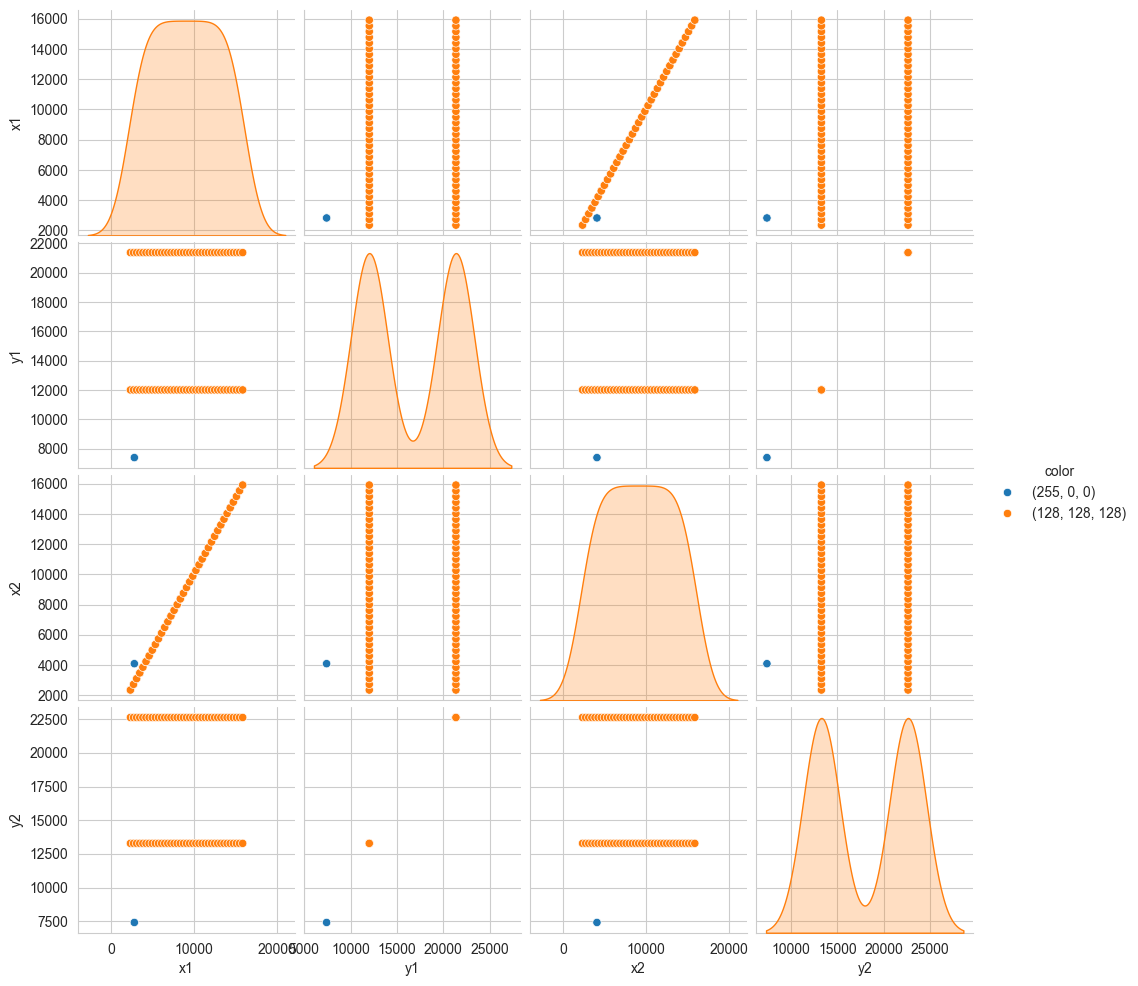

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
# 绘制x1, y1, x2, y2的分布
# 选取某一长度
le = 1269
lines_len = lines_a[lines_a.length == le]
sns.pairplot(lines_len, vars=['x1', 'y1', 'x2', 'y2'], hue='color')

G:\Anaconda\Anaconda3\envs\ruoyan\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


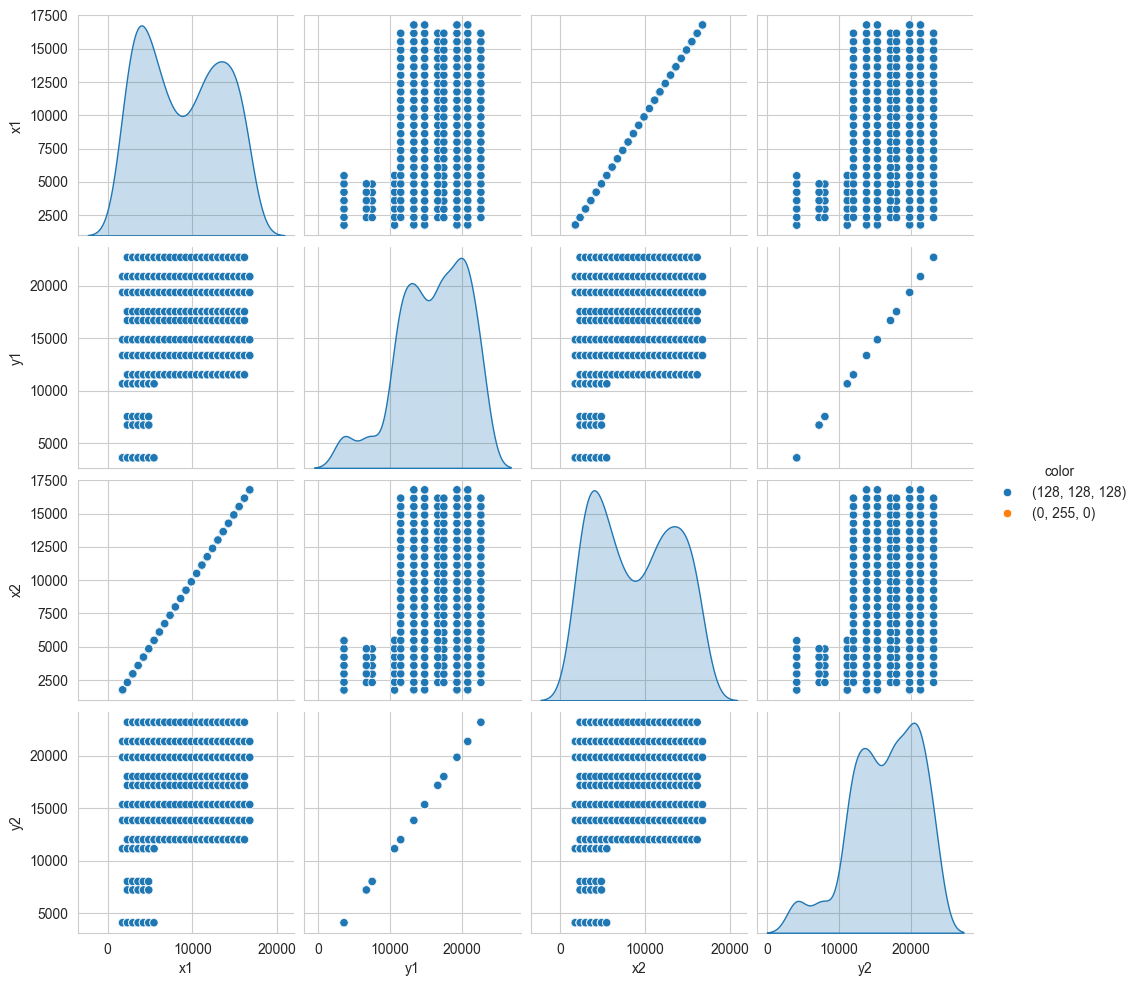

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
# 绘制x1, y1, x2, y2的分布
# 选取某一长度
le = 469
lines_len = lines_a[lines_a.length == le]
sns.pairplot(lines_len, vars=['x1', 'y1', 'x2', 'y2'], hue='color')

In [22]:
white = np.ones_like(ori_img, dtype=np.uint8) * 255
for line in lines_len.values:
    cv2.line(white, (line[1], line[0]), (line[3], line[2]), line[4], 1)
Image.fromarray(white).save(f"workdir/run/{le}.png")

In [13]:
lines_len.values[1]

array([1755, 3625, 1755, 4094, (128, 128, 128), 469], dtype=object)

In [27]:
lines_len = lines_len[lines_len.color == (128, 128, 128)]
# 只保留坐标
lines_len = lines_len[['x1', 'y1', 'x2', 'y2']]
lines_len

,x1,y1,x2,y2
4001,2345,12009,2345,13278
4030,2722,12009,2722,13278
4054,3099,12009,3099,13278
4082,3476,12009,3476,13278
4105,3852,12009,3852,13278
...,...,...,...,...
20997,14402,21358,14402,22627
21028,14779,21358,14779,22627
21048,15156,21358,15156,22627
21084,15533,21358,15533,22627


In [28]:
lines_len.x1.value_counts()

x1
2345     2
9504     2
10258    2
10635    2
11011    2
11388    2
11765    2
12142    2
12518    2
12895    2
13272    2
13649    2
14026    2
14402    2
14779    2
15156    2
15533    2
9881     2
9127     2
2722     2
8751     2
3099     2
3476     2
3852     2
4229     2
4606     2
4983     2
5360     2
5736     2
6113     2
6490     2
6867     2
7243     2
7620     2
7997     2
8374     2
15910    2
Name: count, dtype: int64

In [29]:
lines_len.y1.value_counts()

y1
12009    37
21358    37
Name: count, dtype: int64